In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

#Creates function to remove extra spaces in sim file
def cleanlines(line):
    remove = ['  ', ' ']
    for r in remove:
        clean = line.replace(r, '') 
    split = clean.split(';')
    return split



In [13]:
#Creates empty array for x, y, and z value of hits
darrell_arr = np.dtype({"names": ['x_value', 'y_value','z_value', 'Material', 'Dep Energy [kev]'], "formats": [np.float32, np.float32, np.float32, 'S10', np.float32]})
xlist = []
ylist = []
zlist = []
matlist = []
e_list = []


In [14]:
data = open('FullConcreteModel.inc3.id1.sim', 'r')

In [15]:
a = 'PMConcrete1234.42077'
def findmaterialandE(line):
    for i in range(1, len(line)):
        try:
            if line[-i] == '.':
                continue
            int(line[-i])
            
        except ValueError:
            energy = line[-(i-1):]
            material = line[2:i-1]
            return energy, material
E, mat = findmaterialandE(a)
print(E, mat)

1234.42077 Concrete


In [16]:
#Opens sim file

counter = 1
#Starts tallies in detector at 0
c = 0
hold_lines = []
found = False 
for l in data:
    
    line = cleanlines(l.strip('\n'))
    
    if len(line) >= 1 and line[0][0:2] == 'PM':
        found = True
        
        hold_lines.append(line)
        continue
    if found == True:
        hold_lines.append(line)
        
        if len(line) >= 1 and line[0][0:2] == 'PM':
            hold_lines = []
            found = False
            continue
        if len(line) > 1 and line[0][2:6] == 'BLAK':
            c+=1
#             print('H0=====>>', hold_lines[0][0])
            E, mat = findmaterialandE(hold_lines[0][0])
            #Tallies coordinates of hits
            matlist.append(np.str(mat))
            e_list.append(np.float32(E))
            xlist.append(np.float32(line[4]))
            ylist.append(np.float32(line[5]))
            zlist.append(np.float32(line[6]))
            
            found = False
            hold_lines = []
            
    #if counter > 10000:
       # break
data.close()

Concrete
Concrete
Asphalt1
Concrete
Asphalt1
Concrete
Concrete
Concret
Concrete
Concrete
Asphalt
Asphalt
Concret
Concret
Concrete
Concret
Concrete
Asphalt1
Asphalt1
Asphalt
Concrete
Concrete
Concrete
Concrete
Concrete
Asphalt
Asphalt1
Concrete
Concrete
Concrete
Concrete
Asphalt1
Concrete
Concrete
Concrete
Asphalt1
Asphalt
Asphalt
Asphal
Asphalt
Asphalt1
Asphalt
Asphalt
Concrete
Asphalt1
Concrete
Asphalt
Concret
Concrete
Concrete
Concret
Asphalt
Asphal
Concrete
Concrete
Concrete
Concre
Asphalt1
Asphalt1
Asphal
Asphalt1
Concrete
Concrete
Asphal
Asphal
Asphal
Asphalt1
Concrete
Asphalt1
Asphalt1
Asphalt
Asphalt1
Asphalt1
Concret
Asphalt1
Asphalt1
Concret
Concrete
Concrete
Concrete
Asphal
Concrete
Asphalt1
Asphalt
Concrete
Concrete
Concrete
Asphalt1
Concrete
Asphalt1
Asphalt
Concrete
Concrete
Asphalt1
Asphalt1
Asphalt1
Concrete
Asphalt
Concrete
Concrete
Concrete
Asphalt1
Asphalt
Concrete
Concrete
Concrete
Concret
Concrete
Concret
Concret
Concret
Asphalt1
Concret
Concrete
Concret
Concrete
As

Concret
Asphal
Concrete
Concrete
Concrete
Asphal
Asphalt1
Asphalt1
Concrete
Asphalt1
Asphalt1
Asphalt1
Concrete
Asphalt
Asphalt1
Concrete
Concrete
Asphalt1
Concrete
Concret
Concrete
Concrete
Concrete
Concrete
Asphalt1
Asphalt1
Asphalt1
Asphalt1
Asphalt
Concrete
Concrete
Concrete
Asphalt1
Asphalt1
Concrete
Asphalt1
Asphalt1
Asphalt1
Concrete
Concret
Asphalt1
Concrete
Concrete
Asphalt1
Asphalt1
Concret
Asphalt1
Concrete
Concrete
Concrete
Concret
Asphalt1
Concret
Concrete
Asphalt1
Concrete
Concrete
Concrete
Concrete
Concrete
Concrete
Asphalt1
Concret
Asphal
Concrete
Asphalt1
Asphalt
Concrete
Asphalt
Concret
Concrete
Concrete
Asphalt1
Concrete
Asphalt1
Concrete
Concrete
Concrete
Concrete
Concret
Concret
Concre
Concrete
Asphalt
Asphalt1
Asphalt1
Asphalt1
Concret
Concrete
Concrete
Concrete
Concret
Asphal
Asphalt1
Concrete
Asphalt1
Concrete
Concret
Concrete
Concrete
Asphalt1
Concret
Concrete
Concrete
Concrete
Concre
Asphalt1
Asphalt1
Concrete
Asphalt1
Asphalt
Asphalt1
Asphalt
Concrete
Concret

Concret
Asphalt1
Concrete
Concrete
Concrete
Concrete
Asphalt1
Asphalt1
Asphal
Concret
Concret
Concret
Concret
Concrete
Concrete
Concrete
Concrete
Asphalt1
Concrete
Asphalt1
Concret
Concret
Concrete
Asphalt
Asphalt1
Asphalt1
Concrete
Concrete
Concrete
Concret
Concrete
Concrete
Concret
Concret
Concret
Concret
Concret
Asphal
Asphalt1
Asphalt1
Concrete
Asphalt1
Concrete
Concrete
Asphalt1
Asphalt1
Concret
Concret
Concret
Concrete
Asphalt1
Asphalt1
Asphalt1
Asphalt
Concrete
Asphalt1
Asphalt1
Concrete
Concrete
Concret
Concret
Asphalt
Concret
Concret
Asphalt
Concrete
Concrete
Concrete
Asphalt
Concrete
Concret
Concrete
Asphalt1
Concrete
Asphalt
Concrete
Concrete
Asphalt1
Concrete
Asphalt1
Concrete
Concrete
Concrete
Concrete
Concrete
Concret
Concrete
Asphalt1
Concret
Asphalt1
Concrete
Concrete
Concrete
Asphalt1
Concrete
Concrete
Concret
Concrete
Concrete
Concrete
Asphalt1
Asphalt
Concrete
Concrete
Concret
Concret
Asphalt
Concrete
Asphalt1
Asphalt
Asphalt1
Asphalt1
Asphalt
Concre
Asphalt1
Asphalt

Asphalt1
Asphalt1
Concret
Concret
Concret
Asphalt1
Concrete
Concrete
Concrete
Concrete
Concrete
Concrete
Concret
Concrete
Asphalt1
Concrete
Concrete
Concret
Asphalt1
Asphalt
Concrete
Concrete
Concret
Concre
Concrete
Concrete
Concrete
Concrete
Concrete
Concrete
Concrete
Asphalt1
Concret
Concrete
Concre
Concrete
Asphalt1
Concrete
Asphalt1
Concret
Concrete
Concrete
Asphalt
Asphalt
Asphalt1
Concrete
Concrete
Concret
Asphalt
Concret
Asphalt
Concrete
Concret
Concrete
Concrete
Asphalt
Concrete
Concrete
Concrete
Asphalt1
Concre
Concrete
Asphalt1
Concret
Concret
Asphalt1
Concrete
Asphalt1
Asphalt
Asphalt1
Concrete
Concrete
Concrete
Concrete
Concrete
Asphalt
Asphalt
Concrete
Concrete
Asphalt
Concrete
Asphalt1
Concrete
Asphalt1
Concret
Concrete
Concrete
Concrete
Asphalt1
Asphalt
Asphalt1
Concrete
Concrete
Concret
Concrete
Concrete
Concrete
Concrete
Concret
Concrete
Asphalt1
Concrete
Concrete
Asphalt
Concret
Asphalt
Asphalt
Concrete
Concret
Concrete
Asphalt1
Concret
Concret
Concrete
Asphalt1
Aspha

Concrete
Concrete
Concrete
Asphalt1
Asphalt1
Concrete
Concrete
Concret
Concrete
Concrete
Asphalt
Asphalt1
Asphalt1
Asphalt
Asphalt1
Concrete
Concret
Concrete
Concrete
Concrete
Concrete
Concrete
Asphalt1
Concre
Asphalt1
Asphalt1
Concrete
Concrete
Concrete
Concrete
Concrete
Concret
Concrete
Concret
Asphalt1
Asphalt
Concrete
Asphalt
Asphalt
Asphalt
Asphalt1
Concrete
Concrete
Concrete
Concre
Concrete
Asphalt1
Asphalt1
Concret
Concrete
Asphalt
Concrete
Asphalt
Concrete
Asphalt1
Concrete
Concrete
Concret
Aspha
Concret
Concrete
Concrete
Concrete
Concrete
Asphalt
Concrete
Asphal
Concret
Concrete
Asphalt
Concrete
Concrete
Concrete
Asphalt1
Concrete
Concrete
Concrete
Concret
Concrete
Concre
Concrete
Concrete
Asphalt1
Concret
Concret
Concrete
Asphalt1
Asphalt1
Asphal
Asphalt
Concrete
Concrete
Concrete
Concrete
Asphalt1
Concrete
Concrete
Concrete
Concret
Concrete
Asphal
Concret
Asphalt1
Concrete
Concrete
Asphalt1
Asphalt
Concret
Concrete
Concrete
Concrete
Asphalt1
Concret
Asphalt1
Concrete
Asphalt

Concrete
Concrete
Concret
Asphalt1
Concrete
Asphalt
Concrete
Concrete
Concrete
Concrete
Concret
Concrete
Concret
Asphalt1
Asphalt1
Asphalt1
Concret
Concret
Concret
Concret
Concret
Concret
Concret
Asphalt
Concret
Asphalt
Concrete
Asphalt1
Asphalt1
Concrete
Concret
Concrete
Asphalt1
Concrete
Concrete
Asphalt
Concret
Asphalt1
Concret
Concret
Concrete
Asphalt1
Concrete
Concrete
Asphalt
Concret
Asphalt1
Asphalt1
Concrete
Asphalt1
Asphalt1
Concrete
Concrete
Asphalt1
Concrete
Asphalt
Concret
Asphalt1
Concrete
Concrete
Concret
Concrete
Concrete
Concrete
Concrete
Asphalt1
Asphalt1
Concrete
Asphalt1
Concrete
Concret
Asphalt1
Concrete
Asphalt
Concrete
Asphalt1
Concrete
Concrete
Concret
Asphalt1
Concrete
Concrete
Concrete
Concrete
Concrete
Asphalt
Concret
Asphalt1
Asphalt1
Asphalt1
Concret
Concrete
Concret
Asphalt1
Concret
Concrete
Concrete
Concrete
Concret
Concrete
Concrete
Concrete
Concrete
Asphalt1
Concret
Asphalt
Asphalt1
Asphalt1
Concrete
Asphalt1
Asphalt1
Concrete
Asphalt
Asphalt1
Asphalt1
C

Concret
Asphalt
Asphalt
Concret
Concrete
Concrete
Concrete
Asphalt
Asphalt1
Asphalt1
Asphalt
Asphalt1
Asphalt
Asphalt1
Asphalt
Concrete
Concrete
Asphalt1
Asphalt1
Asphalt1
Concrete
Concrete
Asphalt1
Concrete
Concre
Concrete
Asphalt1
Concrete
Concret
Asphalt1
Asphalt
Asphalt
Asphalt1
Asphalt
Asphalt1
Asphalt1
Asphalt1
Concr
Concrete
Concrete
Concrete
Asphalt1
Asphalt1
Asphalt1
Concrete
Asphalt
Aspha
Concrete
Concrete
Asphalt1
Concrete
Asphalt1
Concret
Concrete
Concrete
Concrete
Concrete
Concret
Concret
Concret
Concrete
Concrete
Concrete
Concret
Concret
Concret
Concr
Asphalt
Asphalt1
Concret
Asphalt1
Concrete
Concrete
Concrete
Concret
Concret
Concret
Concrete
Concret
Asphalt1
Concrete
Concret
Concrete
Concret
Concre
Asphalt
Asphalt
Asphalt
Concrete
Concret
Concrete
Asphalt
Concrete
Concrete
Asphalt1
Concrete
Concrete
Asphalt1
Concrete
Concrete
Concrete
Asphalt1
Concrete
Concrete
Concrete
Concret
Concrete
Asphalt1
Asphalt1
Asphalt1
Asphalt1
Concrete
Concrete
Concret
Asphalt1
Concrete
Conc

In [18]:
print(c)

useful_arr = np.zeros(len(xlist), darrell_arr)
useful_arr['x_value'] = xlist
useful_arr['y_value'] = ylist
useful_arr['z_value'] = zlist
useful_arr['Dep Energy [kev]'] = e_list
useful_arr['Material'] = matlist
useful_arr[5]

7872


(657.3152, -361.16028, 336.12778, b'Concrete', 1114.7317)

In [20]:
useful_arr[5:40]

array([( 657.3152 , -361.16028, 336.12778, b'Concrete', 1114.7317 ),
       (-712.9144 , -232.92278, 453.07767, b'Concrete', 1332.492  ),
       ( 747.7327 ,   58.27344, 440.4301 , b'Concret',  660.123  ),
       ( 319.131  ,  678.716  , 396.3995 , b'Concrete', 1332.492  ),
       (-678.8907 , -318.75922, 571.3133 , b'Concrete', 1332.492  ),
       ( 451.2255 ,  599.0789 , 234.87614, b'Asphalt',  304.2038 ),
       ( 722.4262 ,  201.49536, 318.83737, b'Asphalt',  233.45822),
       (-744.1683 ,  -93.34678, 472.0699 , b'Concret',  589.6469 ),
       (-204.08939, -721.69763, 370.2678 , b'Concret',  330.92874),
       (-440.21185, -607.21783,  73.90537, b'Concrete', 1332.492  ),
       (-749.3621 ,  -30.92602, 222.48807, b'Concret',  891.8093 ),
       (-724.8106 ,  192.74237, 380.57   , b'Concrete', 1058.7856 ),
       (-701.03766,  266.54495, 452.9302 , b'Asphalt1', 1332.492  ),
       (-570.8825 ,  486.40845, 156.6137 , b'Asphalt1', 1332.492  ),
       ( 549.68164,  510.24512,  20.6809

In [21]:
#Generates phi -180 to 180 degrees
phi = np.arctan2(useful_arr['y_value'],useful_arr['x_value'])*180/np.pi
phi[:10]

array([ 139.39621  ,  103.79322  ,  155.80229  ,  133.05031  ,
        -64.50268  ,  -28.786491 , -161.9068   ,    4.4562545,
         64.81718  , -154.84856  ], dtype=float32)

In [22]:
#Coverts phi degrees into cm
x = phi*np.pi*750/180
x[:10]

array([ 1824.6921  ,  1358.6501  ,  2039.4473  ,  1741.6245  ,
        -844.33813 ,  -376.81433 , -2119.3552  ,    58.332237,
         848.45483 , -2026.9629  ], dtype=float32)

In [23]:
#Confirms constant r of 750 cm
r = np.sqrt(useful_arr['x_value']**2+useful_arr['y_value']**2)
r[:10]

array([750.     , 750.     , 750.00006, 750.     , 750.     , 750.     ,
       750.     , 750.00006, 750.     , 750.     ], dtype=float32)

In [24]:
z = useful_arr['z_value']
z[:10]

array([830.56775, 479.43512,  59.59107, 840.2235 , 378.3176 , 336.12778,
       453.07767, 440.4301 , 396.3995 , 571.3133 ], dtype=float32)

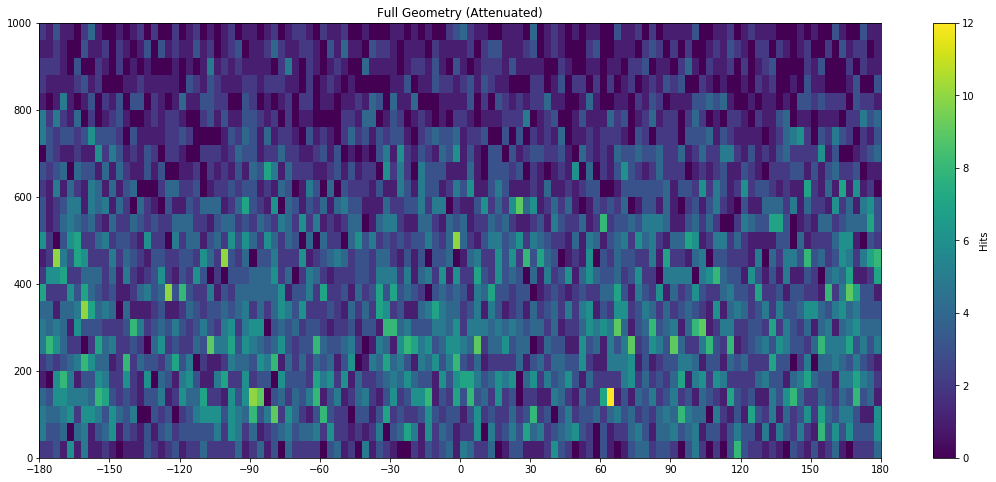

In [26]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap, _, __ = np.histogram2d(phi,useful_arr['z_value'], bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
# plt.xlim(100, 180)
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Full Geometry (Attenuated)')
plt.savefig('Full_Attenuated.png')
plt.show()

In [ ]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter


def myplot(phi,z, s, bins=[xedges, yedges]):
    heatmap, _, __ = np.histogram2d(phi,z, bins=[xedges, yedges])
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


fig, axs = plt.subplots(2, 2)


sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(phi,z, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        img, extent = myplot(phi,z, s)
        ax.imshow(img, extent=extent, origin='lower',aspect='auto', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()


In [ ]:
heatmap?